In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [9]:
# Date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
# Checking for duplicates
print("Duplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [11]:
# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [12]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [13]:
# As price_y is a repeated column (same as price_x)
merged_data.drop(columns=['Price_y'], inplace=True)

In [14]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_20752\447343773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="rocket")


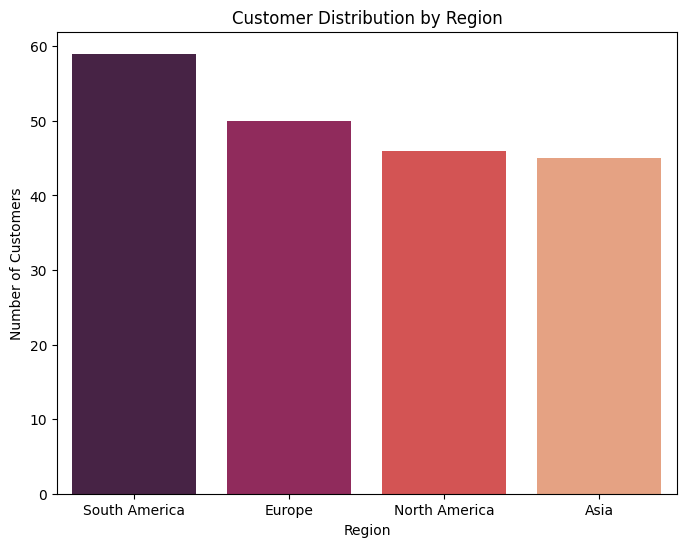

In [16]:
# Customer Distribution by Region

region_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="rocket")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

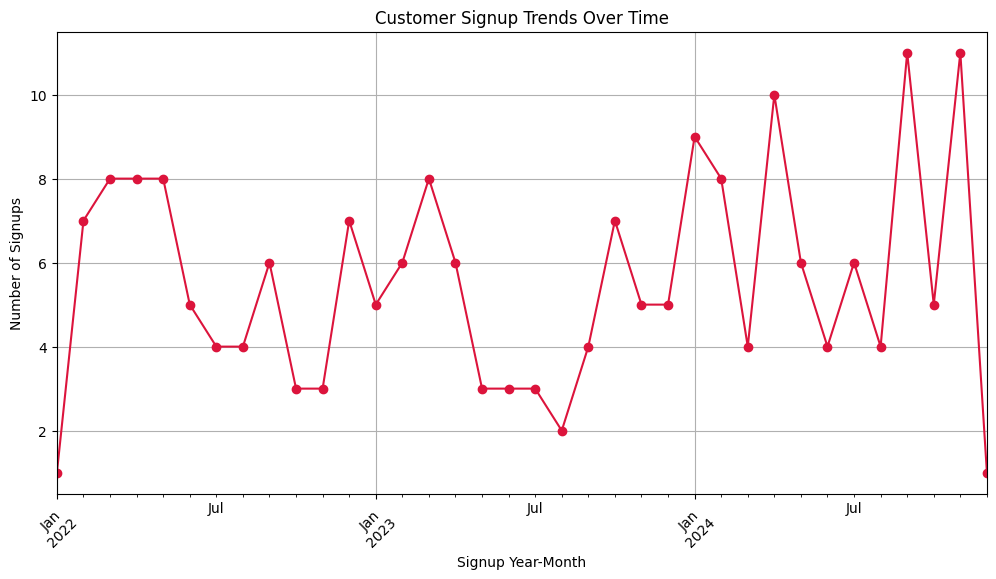

In [17]:
# Signup Trends Over Time

customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind="line", marker='o', color='crimson')
plt.title("Customer Signup Trends Over Time")
plt.ylabel("Number of Signups")
plt.xlabel("Signup Year-Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20752\520903040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="rocket")


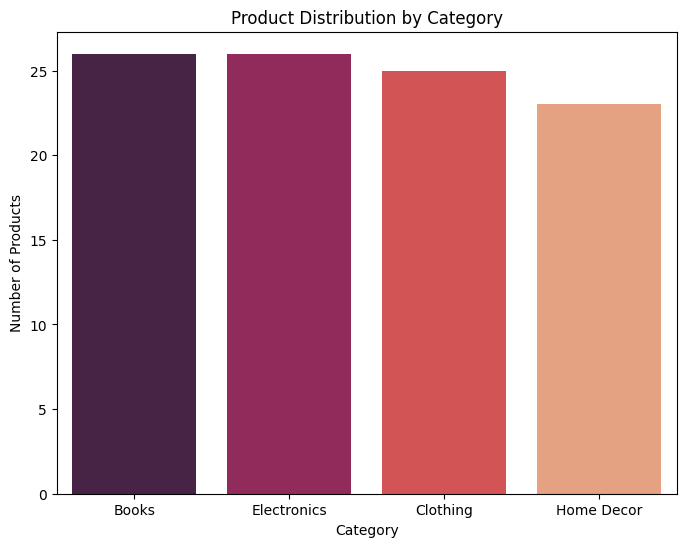

In [18]:
# Product Distribution by Category

category_distribution = products['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="rocket")
plt.title("Product Distribution by Category")
plt.ylabel("Number of Products")
plt.xlabel("Category")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20752\3948403440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sold_products.values, y=top_sold_products.index, palette="rocket")


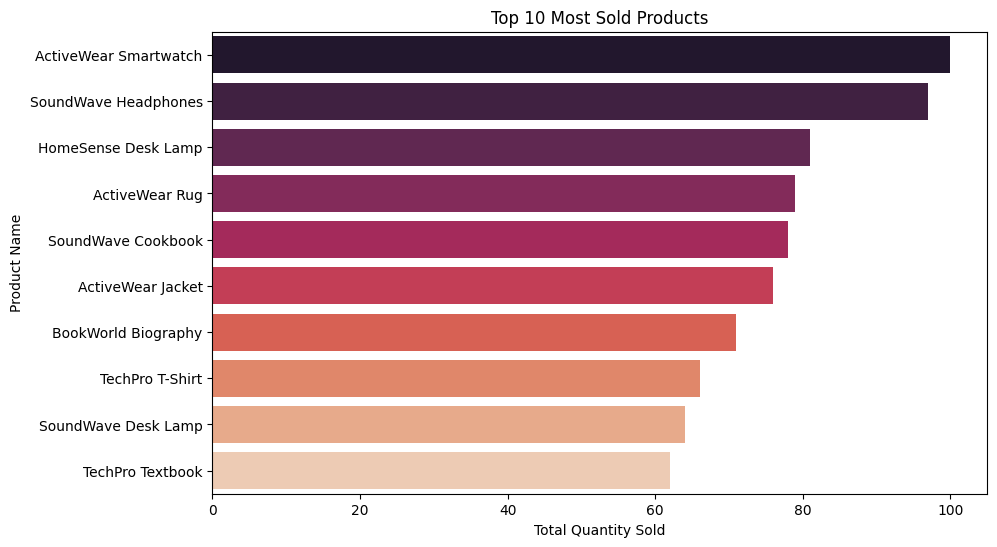

In [19]:
# Top 10 Most Sold Products

top_sold_products = (
    merged_data.groupby('ProductName')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sold_products.values, y=top_sold_products.index, palette="rocket")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

<Figure size 1200x800 with 0 Axes>

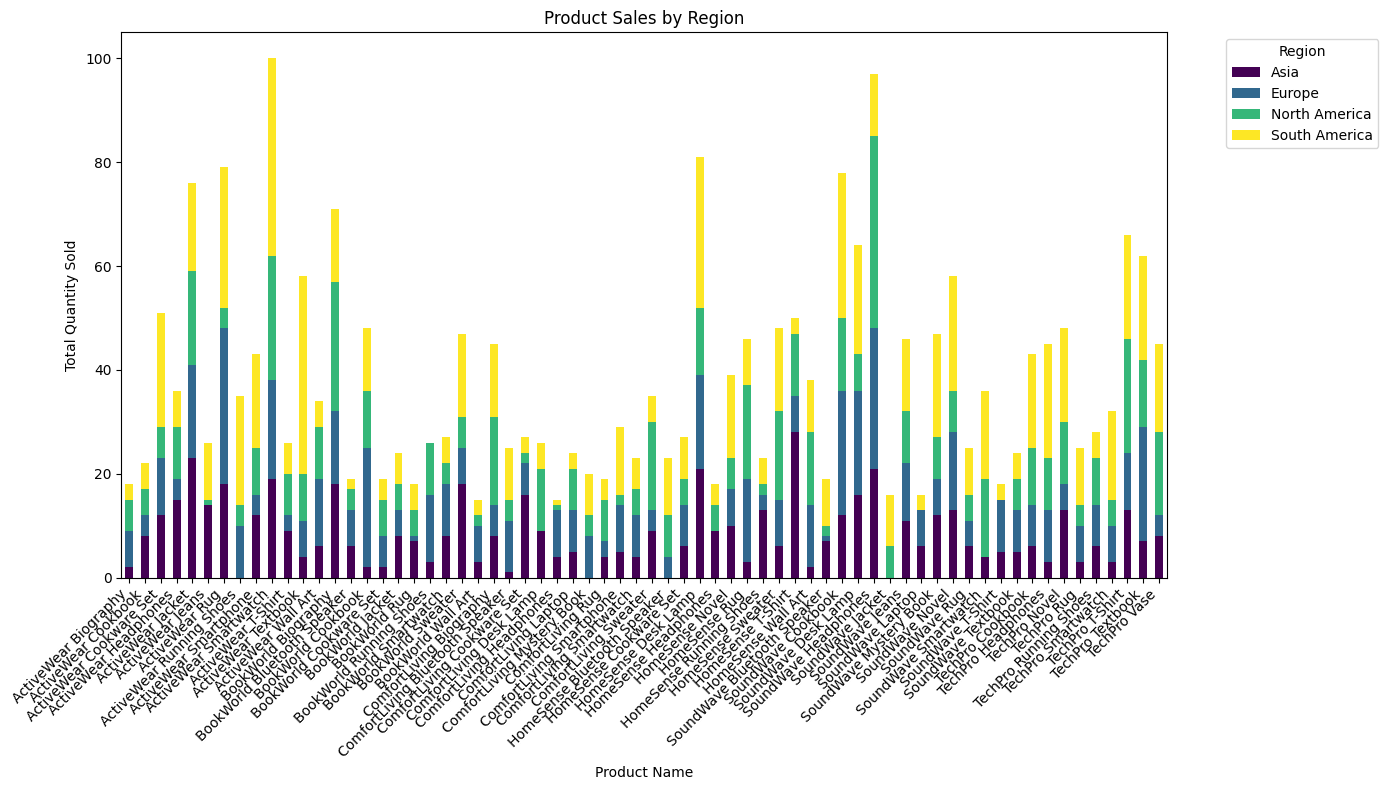

In [20]:
# Product Sales by Region

region_product_sales = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
region_product_sales_sorted = region_product_sales.sort_values(['Region', 'Quantity'], ascending=[True, False])

plt.figure(figsize=(12, 8))
pivot_data = region_product_sales_sorted.pivot(index='ProductName', columns='Region', values='Quantity').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Product Sales by Region")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Top 5 Products Sold in Each Region:
            Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
4             Asia      ActiveWear Jacket        23
33            Asia    HomeSense Desk Lamp        21
44            Asia   SoundWave Headphones        21
8             Asia  ActiveWear Smartwatch        19
67          Europe         ActiveWear Rug        30
106         Europe   SoundWave Headphones        27
104         Europe     SoundWave Cookbook        24
76          Europe     BookWorld Cookbook        23
121         Europe       TechPro Textbook        22
170  North America   SoundWave Headphones        37
136  North America    BookWorld Biography        25
132  North America  ActiveWear Smartwatch        24
184  North America        TechPro T-Shirt        22
127  North America      ActiveWear Jacket        18
196  South America  ActiveWear Smartwatch        38
198  South America    ActiveWear Textbook        38
222  South America    HomeSe

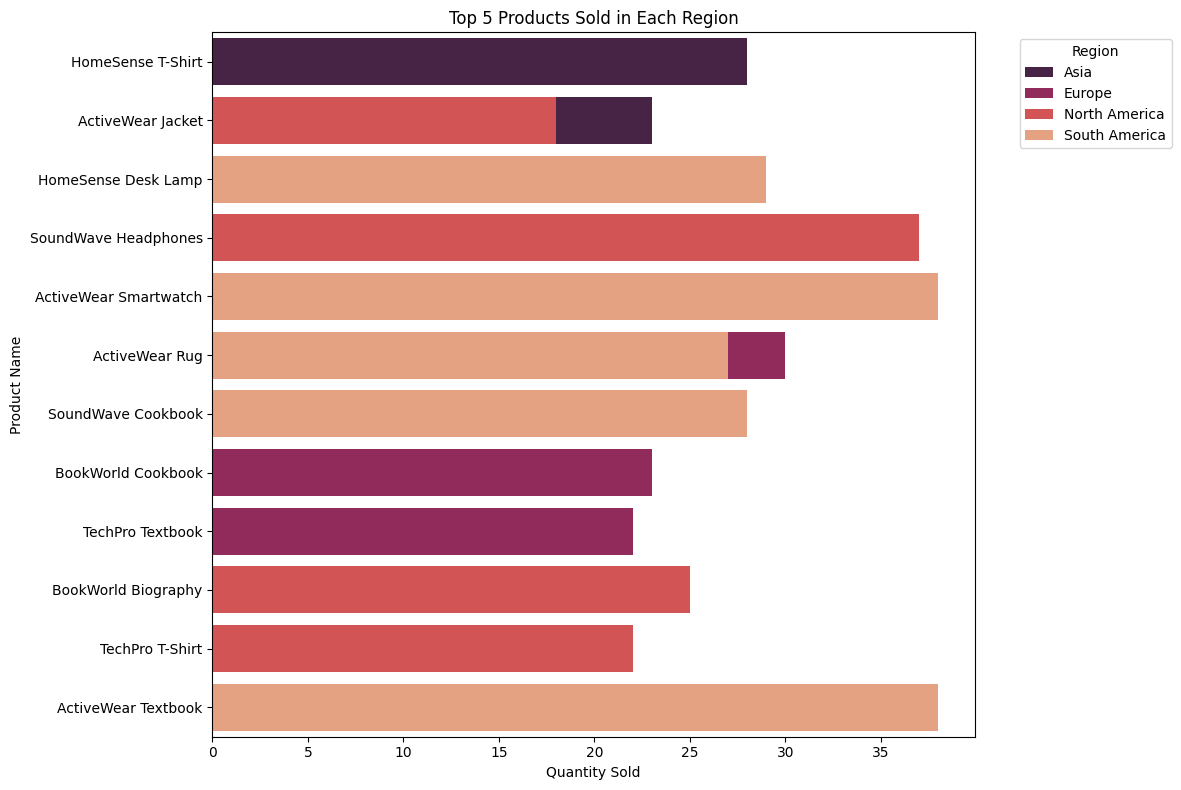

In [21]:
# Top 5 products sold region-wise

region_product_sales = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()

region_product_sales = region_product_sales.sort_values(['Region', 'Quantity'], ascending=[True, False])

top_5_products_by_region = region_product_sales.groupby('Region').head(5)

print("Top 5 Products Sold in Each Region:")
print(top_5_products_by_region)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_products_by_region,
    x='Quantity',
    y='ProductName',
    hue='Region',
    dodge=False,
    palette='rocket'
)
plt.title('Top 5 Products Sold in Each Region')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

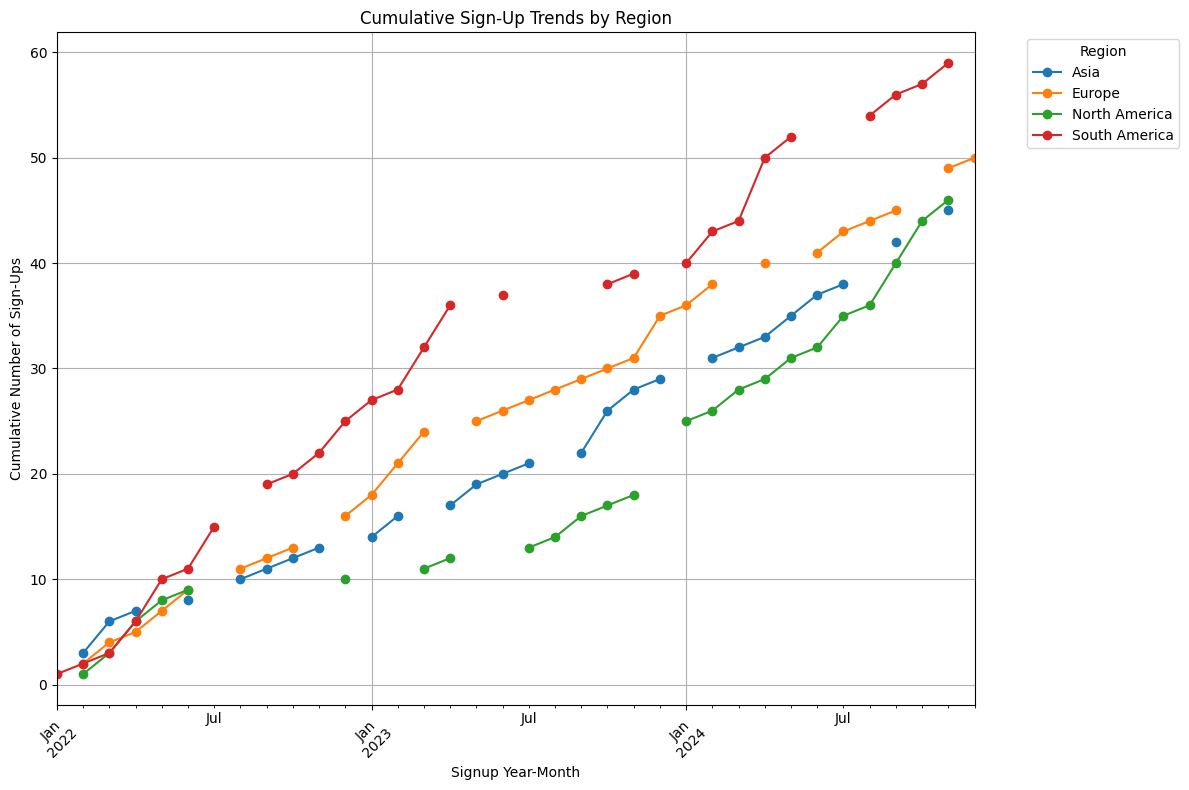

In [22]:
# Region-wise sign-up trend

customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

signup_trends_regionwise = customers.groupby(['Region', 'SignupYearMonth']).size().reset_index(name='Count')

signup_trends_regionwise['CumulativeCount'] = signup_trends_regionwise.groupby('Region')['Count'].cumsum()

signup_trends_cumulative = signup_trends_regionwise.pivot(index='SignupYearMonth', columns='Region', values='CumulativeCount')

plt.figure(figsize=(12, 8))
signup_trends_cumulative.plot(ax=plt.gca(), marker='o')

plt.title("Cumulative Sign-Up Trends by Region")
plt.xlabel("Signup Year-Month")
plt.ylabel("Cumulative Number of Sign-Ups")
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_20752\3419708388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="rocket")


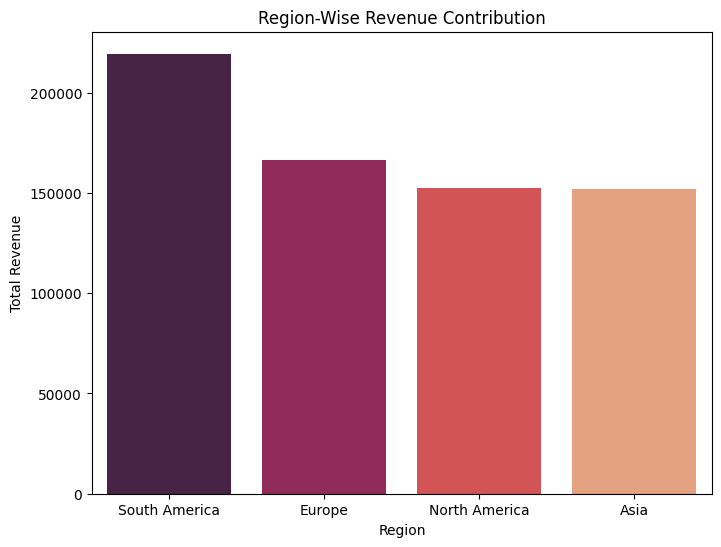

In [23]:
# Region-Wise Revenue Contribution

region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="rocket")
plt.title("Region-Wise Revenue Contribution")
plt.ylabel("Total Revenue")
plt.xlabel("Region")
plt.show()

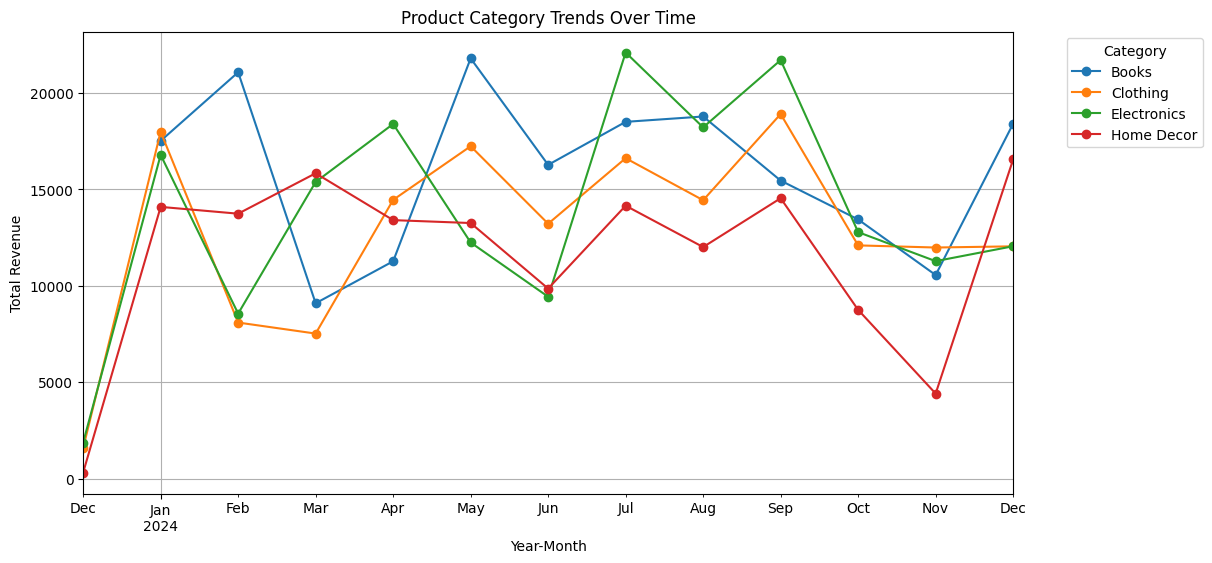

In [24]:
# Product Category Trends Over Time

merged_data['TransactionYearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
category_trends = merged_data.groupby(['TransactionYearMonth', 'Category'])['TotalValue'].sum().unstack()
plt.figure(figsize=(12, 6))
category_trends.plot(ax=plt.gca(), marker='o', figsize=(12, 6))
plt.title("Product Category Trends Over Time")
plt.ylabel("Total Revenue")
plt.xlabel("Year-Month")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20752\2480953843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="rocket")


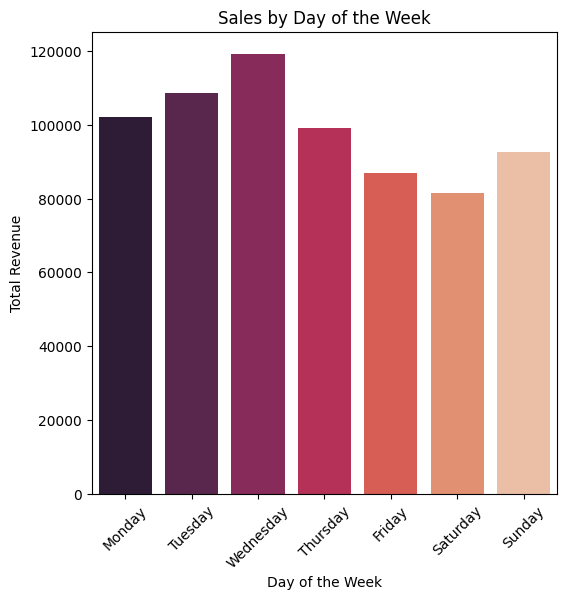

C:\Users\HP\AppData\Local\Temp\ipykernel_20752\2480953843.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_sales.index, y=month_sales.values, palette="rocket")


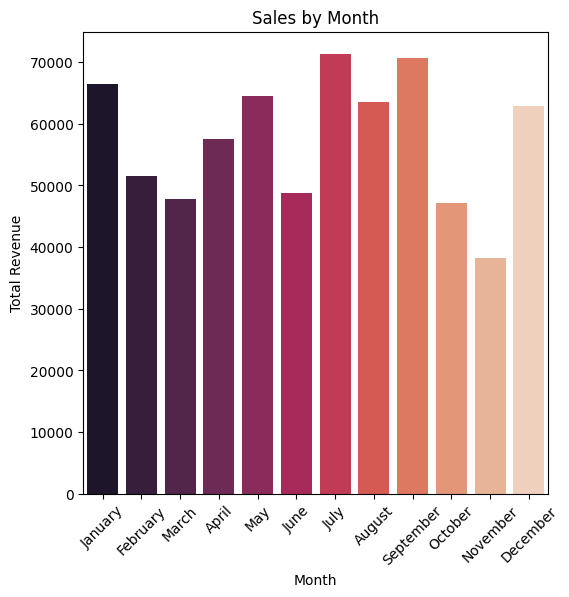

In [25]:
# Seasonal and Temporal Trends

merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()
merged_data['Month'] = merged_data['TransactionDate'].dt.month_name()

weekday_sales = merged_data.groupby('DayOfWeek')['TotalValue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(6, 6))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="rocket")
plt.title("Sales by Day of the Week")
plt.ylabel("Total Revenue")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.show()

month_sales = merged_data.groupby('Month')['TotalValue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(6, 6))
sns.barplot(x=month_sales.index, y=month_sales.values, palette="rocket")
plt.title("Sales by Month")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Top 10 Frequently Sold-Together Itemsets

from mlxtend.frequent_patterns import apriori, association_rules
transactions_grouped = transactions.groupby(['TransactionID', 'ProductID']).size().unstack(fill_value=0)
transactions_binary = transactions_grouped.map(lambda x: x > 0)
frequent_itemsets = apriori(transactions_binary, min_support=0.005, use_colnames=True)
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the support threshold.")
else:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

    if rules.empty:
        print("No Frequently Sold-Together items found.")
    else:
        rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

        print("Top 10 Rules for Frequently Sold-Together Products:")
        print(rules.head(10))

No Frequently Sold-Together items found.
